In [1]:
from deepface import DeepFace
from retinaface import RetinaFace
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

[False, 0.4737335825447071]


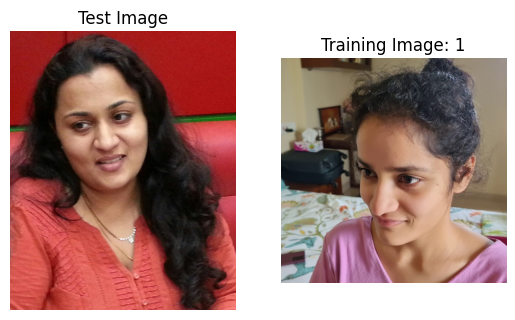

---------------------------------
[True, 0.67293301344147]


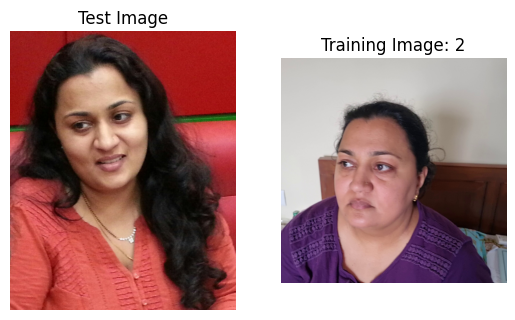

---------------------------------
[False, 0.0996643525011276]


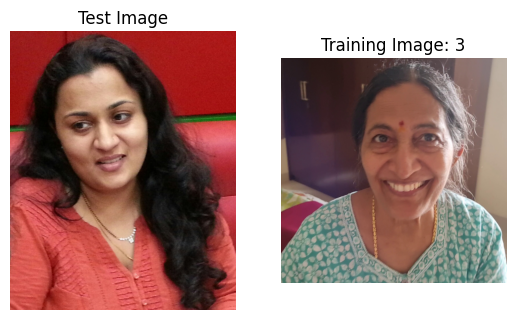

---------------------------------
[False, 0.05500900691862254]


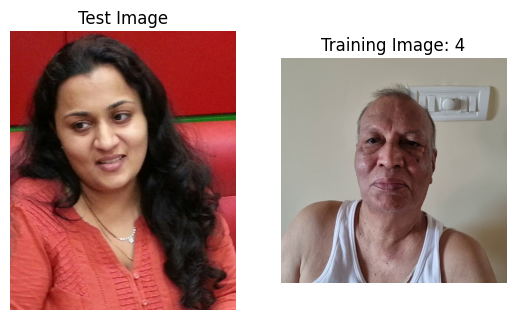

---------------------------------
2


In [5]:
def recognize_single(img):

    img_loaded = cv2.imread(img)
    img_loaded = cv2.cvtColor(img_loaded, cv2.COLOR_BGR2RGB)
    dataset_path = r'C:\Users\anush\OneDrive\Desktop\Work\Infosys-attendance\dataset'
    training_data = os.path.join(dataset_path, 'train')

    results = {}
    for person in os.listdir(training_data): 
        train_img = os.listdir(os.path.join(training_data, person))[0]
        train_img = os.path.join(training_data, person, train_img)
        train_loaded = cv2.imread(train_img)
        train_loaded = cv2.cvtColor(train_loaded, cv2.COLOR_BGR2RGB)
        result = DeepFace.verify(img1_path=img, img2_path=train_img, model_name='Facenet')#, enforce_detection=False)
        results[person] = [result['verified'], 1 - result['distance']]
        print(results[person])
        # Display the test image on the left
        plt.subplot(1, 2, 1)
        plt.imshow(img_loaded)
        plt.title("Test Image")
        plt.axis('off')  # Hide axes

        # Display the training image on the right
        plt.subplot(1, 2, 2)
        plt.imshow(train_loaded)
        plt.title(f"Training Image: {person}")
        plt.axis('off')  # Hide axes

        # Show the plot
        plt.show()
        print('---------------------------------')

    max_sim = max([x[1] for x in results.values()])
    for key, value in results.items():
        if value[1] == max_sim:
            target_person = key
            break

    return target_person 

test_img = r'C:\Users\anush\OneDrive\Desktop\Work\Infosys-attendance\dataset\test\single\122.jpg'
print(recognize_single(test_img))

In [8]:
def recognize_single_sim(img, folder):

    dataset_path = r'C:\Users\anush\OneDrive\Desktop\Work\Infosys-attendance\dataset'
    db_path = os.path.join(dataset_path, folder)
    df = DeepFace.find(img_path=img, db_path=db_path, enforce_detection=False)

    df = pd.DataFrame(df[0])
    df['label'] = df['identity'].apply(lambda x: x.split('\\')[-2])
    df['similarity'] = df['distance'].apply(lambda x: 1-x)

    df_score_sum = df.groupby('label')['similarity'].sum()
    total_score = df['similarity'].sum()

    face_score_mapping = dict()
    for idx, data in enumerate(df_score_sum):
        face_score_mapping[df_score_sum.index[idx]] = (data / total_score) * 100

    return face_score_mapping

test_img = r'C:\Users\anush\OneDrive\Desktop\Work\Infosys-attendance\dataset\test\single\330.jpg'
print(recognize_single_sim(test_img, r'train\2'))
print(recognize_single_sim(test_img, r'train\4'))

24-06-25 14:56:12 - Searching C:\Users\anush\OneDrive\Desktop\Work\Infosys-attendance\dataset\test\single\330.jpg in 29 length datastore
24-06-25 14:56:46 - find function duration 35.17904567718506 seconds
{'2': 100.00000000000003}
24-06-25 14:56:46 - Searching C:\Users\anush\OneDrive\Desktop\Work\Infosys-attendance\dataset\test\single\330.jpg in 30 length datastore
24-06-25 14:57:01 - find function duration 14.550889015197754 seconds
{'4': 100.0}


4 faces detected in image.
[False, 0.32831869414112214]


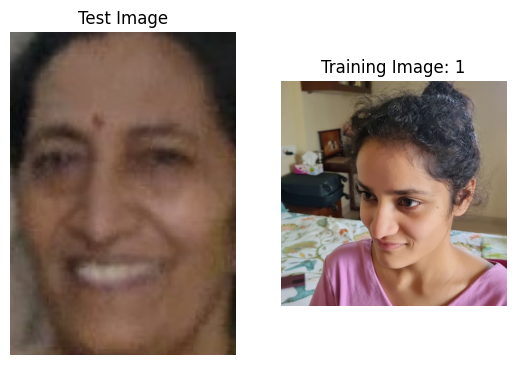

---------------------------------
[False, 0.1339234526006956]


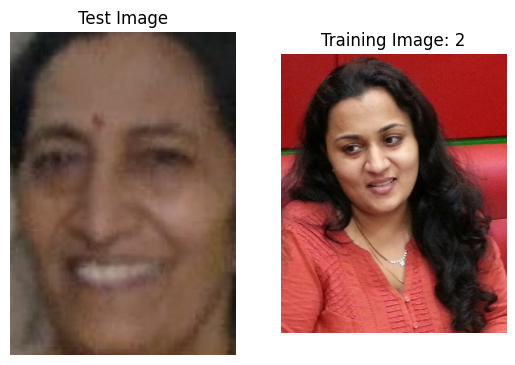

---------------------------------
[True, 0.6427451568272179]


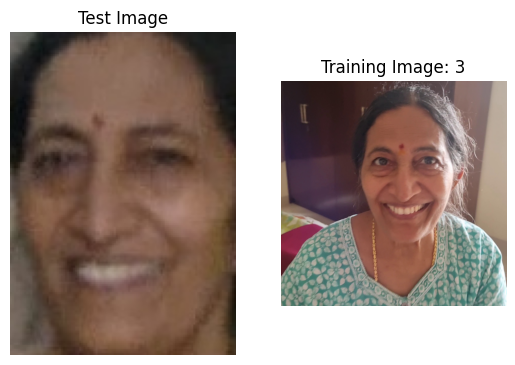

---------------------------------
[False, 0.5123913829938356]


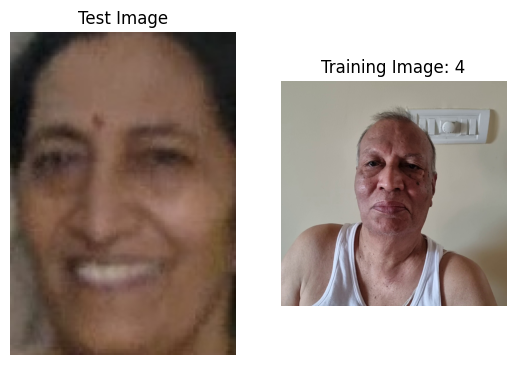

---------------------------------
[False, 0.5035245303285241]


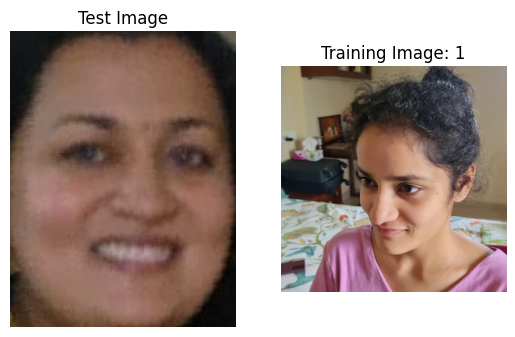

---------------------------------
[True, 0.70172152529376]


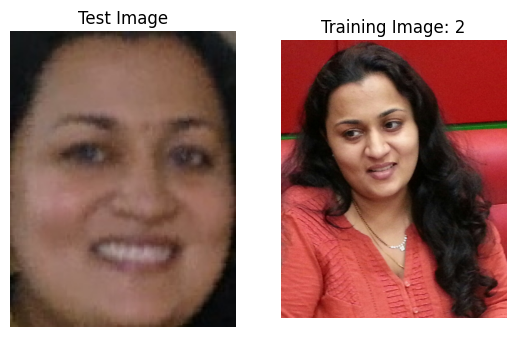

---------------------------------
[False, 0.4389103922933062]


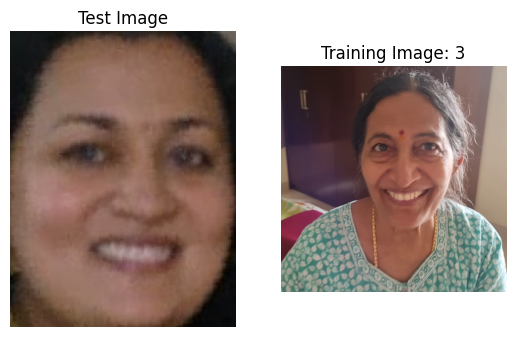

---------------------------------
[False, 0.3363379665859506]


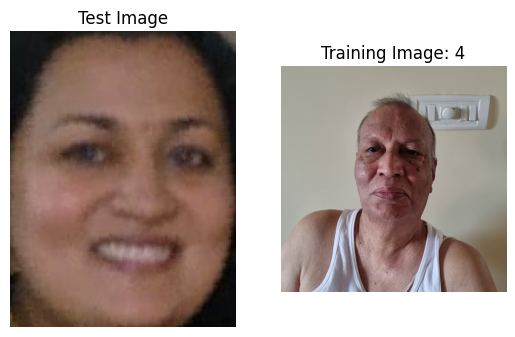

---------------------------------
[False, 0.023624662003110752]


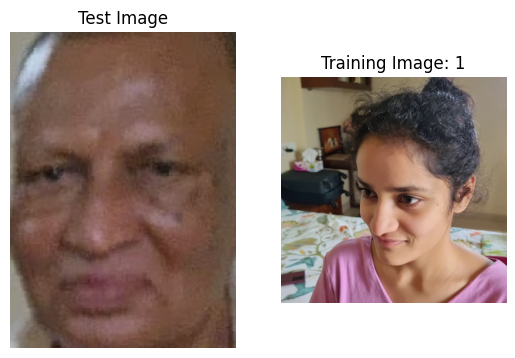

---------------------------------
[False, -0.04585255841757108]


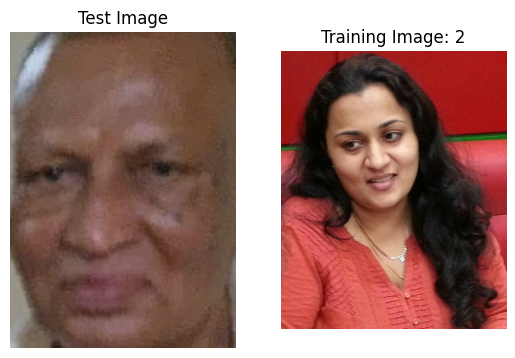

---------------------------------
[False, 0.2368085870699972]


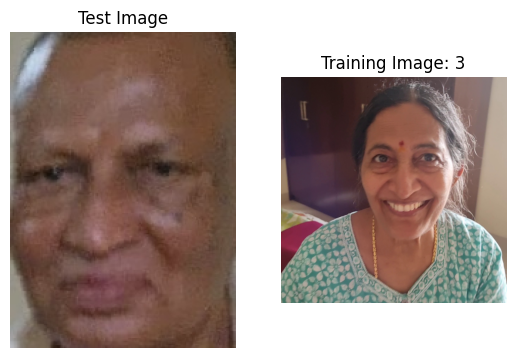

---------------------------------
[True, 0.6203982437933883]


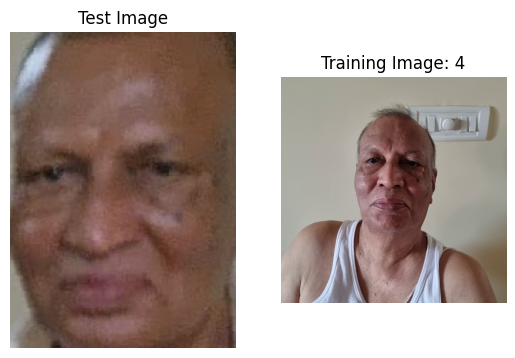

---------------------------------
[True, 0.6446147801787969]


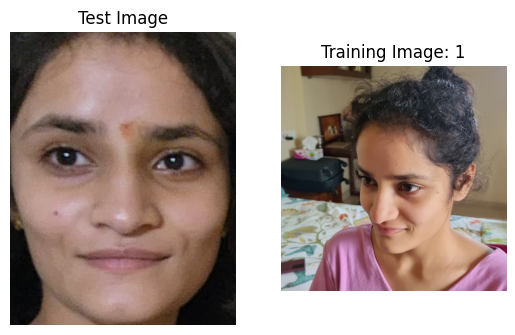

---------------------------------
[False, 0.39824729196242126]


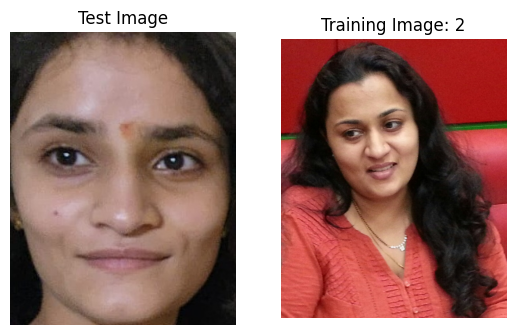

---------------------------------
[False, 0.31553756937948974]


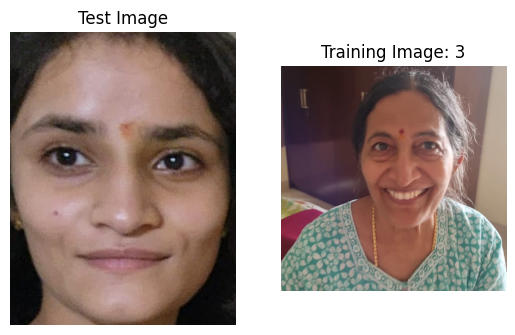

---------------------------------
[False, 0.05912079632920619]


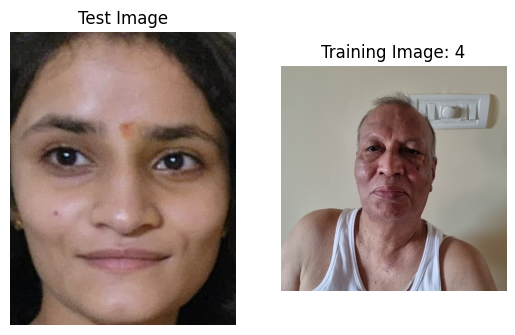

---------------------------------
['3']
['2']
['4']
['1']


In [6]:
def recognize_single(img):

    img_loaded = cv2.imread(img)
    img_loaded = cv2.cvtColor(img_loaded, cv2.COLOR_BGR2RGB)
    dataset_path = r'C:\Users\anush\OneDrive\Desktop\Work\Infosys-attendance\dataset'
    training_data = os.path.join(dataset_path, 'train')

    results = {}
    for person in os.listdir(training_data): 
        train_img = os.listdir(os.path.join(training_data, person))[0]
        train_img = os.path.join(training_data, person, train_img)
        train_loaded = cv2.imread(train_img)
        train_loaded = cv2.cvtColor(train_loaded, cv2.COLOR_BGR2RGB)
        result = DeepFace.verify(img1_path=img, img2_path=train_img, model_name='Facenet')#, enforce_detection=False)
        results[person] = [result['verified'], 1 - result['distance']]
        print(results[person])
        # Display the test image on the left
        plt.subplot(1, 2, 1)
        plt.imshow(img_loaded)
        plt.title("Test Image")
        plt.axis('off')  # Hide axes

        # Display the training image on the right
        plt.subplot(1, 2, 2)
        plt.imshow(train_loaded)
        plt.title(f"Training Image: {person}")
        plt.axis('off')  # Hide axes

        # Show the plot
        plt.show()
        print('---------------------------------')

    max_sim = max([x[1] for x in results.values()])
    for key, value in results.items():
        if value[1] == max_sim:
            target_person = key
            break

    return target_person 

def process_grp(img_path):
    results = []
    faces = RetinaFace.extract_faces(img_path)
    print(f'{len(faces)} faces detected in image.')
    # img_loaded = cv2.imread(img_path)
    # img_laoded = cv2.cvtColor(img_loaded, cv2.COLOR_BGR2RGB)
    for face in faces:
        face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        cv2.imwrite('face.jpg', face)
        result = [recognize_single('face.jpg')]
        results.append(result)
    return results

img_path = r'C:\Users\anush\OneDrive\Desktop\Work\Infosys-attendance\dataset\test\group\tester.jpeg'
results = process_grp(img_path)
for i in results:
    print(i)